In [2]:
from PyPDF2 import PdfReader

In [3]:
class PdfParser:
    def __init__(self, pdf_path):
        self.pdf_path = pdf_path
        self.pdf = PdfReader(pdf_path)

    def extract_text(self, page_num):
        return self.pdf.pages[page_num].extractText()
    
    @property
    def num_pages(self):
        return len(self.pdf.pages)


In [13]:
pdf_path = '../pdf/M01 QAT v ECU post-match report 1.1.pdf'
pdf_parser = PdfParser(pdf_path)

In [72]:
def parse_result_page(text):
    '''
    Parse the text of the first page and return a dictionary of the data.
    ---
    lines are split by '\n'
    ---
    l0 Ignore ("Match Summary - T eams")
    l1 Teams (e.g., Qatar Ecuador)
    l2 Ignore ("STARTING")
    l3-13 Starting lineups for the Home team (e.g. 1 GK SAAD A LSHEEB)
    l14 Ignore (SUBSTITUTES)
    l15-n Substitutes for the Home team (e.g. 12 MF MOHAMMED AL BURAYK)
    - Skip to the line with ("Distribution in the Final ThirdSTARTING")
    - Same as above for the Away team
    - Date (e.g., "20 N ovember") - Venue (e.g., "A l Bayt Stadium") - KO time (e.g., "19:00")
    - Formation for the Home team (e.g., "5-3-2")
    - Formation for the Away team (e.g., "4-4-2")
    '''
    text_lines = text.split('\n')
    # matchup = text_lines[1]
    home_starting = text_lines[3:14]
    home_bench_end_index = get_first_line_non_player(text_lines[14:], 'home')
    home_bench = text_lines[14:home_bench_end_index]
    home_end = find_line_index(text_lines[home_bench_end_index:], 'Distribution in the Final ThirdSTARTING')
    
    away_starting = text_lines[home_end+1:home_end+12]
    away_bench_end_index = get_first_line_non_player(text_lines[home_end+12:], 'away')
    away_bench = text_lines[home_end+12:away_bench_end_index]
    away_end = get_first_line_non_player(text_lines[away_bench_end_index:], 'away')
    
    time_venue = text_lines[away_end]
    home_formation = text_lines[away_end+1]
    away_formation = text_lines[away_end+2]
    
    res = []
    res.append({'type': 'meta', 'time_venue': time_venue})
    res.append({'type': 'meta', 'home_formation': home_formation})
    res.append({'type': 'meta', 'away_formation': away_formation})
    
    for p in home_starting:
        res.append(parse_player_line(p, 'home', 'starting'))
    for p in home_bench:
        res.append(parse_player_line(p, 'home', 'bench'))
    for p in away_starting:
        res.append(parse_player_line(p, 'away', 'starting'))
    for p in away_bench:
        res.append(parse_player_line(p, 'away', 'bench'))
    return res
        



In [91]:
from PIL import Image
from io import BytesIO

In [97]:
def get_image_from_pdf_image(image):
    return Image.open(BytesIO(image.data))

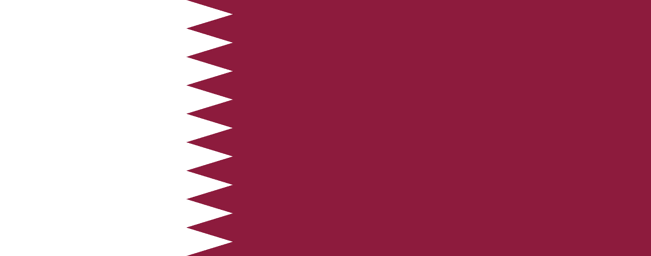

In [101]:
get_image_from_pdf_image(pdf_parser.pdf.pages[1].images[0])

In [83]:
parse_result_page(pdf_parser.extract_text(1))

Match Summary - T eams
Qatar Ecuador
STARTING
1 GK SAAD A LSHEEB 15'
2 DF PEDRO M IGUEL
3 MF ABDELKARIM H ASSAN
6 MF ABDULAZIZ HATEM
10 MF HASSAN A LHAYDOS (C) 71'
11 FW AKRAM A FIF 78'
12 MF KARIM B OUDIAF 36'
14 DF HOMAM A HMED
15 DF BASSAM A LRAWI
16 DF BOUALEM K HOUKHI
19 FW ALMOEZ ALI 22' 72'
SUBSTITUTES
21 GK YOUSOF HASSAN
22 GK MESHAAL BARSHAM
4 DF MOHAMMED W AAD 71'
5 DF TAREK SALMAN
7 FW AHMED A LAAELDIN
8 MF ALI ASAD
9 FW MOHAMMED M UNTARI 72'
13 DF MUSAAB K HIDIR
17 DF ISMAIL M OHAMAD
18 FW KHALID M UNEER
20 MF SALEM A LHAJRI
23 MF ASSIM M ADIBO
24 MF NAIF ALHADHRAMI
25 MF JASSEM G ABER
26 MF MOUSTAFA TAREK221144
1111
1199 11551166 11223366
11
11001133
771177
22 1111
22332200
33
11001199
11


[{'type': 'meta', 'time_venue': 'Match Summary - T eams'},
 {'type': 'meta', 'home_formation': 'Qatar Ecuador'},
 {'type': 'meta', 'away_formation': 'STARTING'},
 {'team': 'home',
  'status': 'starting',
  'type': 'player',
  'number': '1',
  'position': 'GK',
  'name': 'SAAD A LSHEEB'},
 {'team': 'home',
  'status': 'starting',
  'type': 'player',
  'number': '2',
  'position': 'DF',
  'name': 'PEDRO M IGUEL'},
 {'team': 'home',
  'status': 'starting',
  'type': 'player',
  'number': '3',
  'position': 'MF',
  'name': 'ABDELKARIM H ASSAN'},
 {'team': 'home',
  'status': 'starting',
  'type': 'player',
  'number': '6',
  'position': 'MF',
  'name': 'ABDULAZIZ HATEM'},
 {'team': 'home',
  'status': 'starting',
  'type': 'player',
  'number': '10',
  'position': 'MF',
  'name': 'HASSAN A LHAYDOS'},
 {'team': 'home',
  'status': 'starting',
  'type': 'player',
  'number': '11',
  'position': 'FW',
  'name': 'AKRAM A FIF'},
 {'team': 'home',
  'status': 'starting',
  'type': 'player',
  'n

In [108]:
pdf_parser.pdf.pages[0]

{'/Type': '/Page',
 '/Resources': {'/ProcSet': ['/PDF', '/Text', '/ImageB', '/ImageC', '/ImageI'],
  '/ExtGState': {'/G3': {'/ca': 1, '/BM': '/Normal'}},
  '/XObject': {'/X4': {'/Type': '/XObject',
    '/Subtype': '/Image',
    '/Width': 2000,
    '/Height': 1125,
    '/ColorSpace': '/DeviceRGB',
    '/SMask': {'/Type': '/XObject',
     '/Subtype': '/Image',
     '/Width': 2000,
     '/Height': 1125,
     '/ColorSpace': '/DeviceGray',
     '/BitsPerComponent': 8,
     '/Filter': '/FlateDecode'},
    '/BitsPerComponent': 8,
    '/Filter': '/FlateDecode'},
   '/X6': {'/Type': '/XObject',
    '/Subtype': '/Image',
    '/Width': 122,
    '/Height': 48,
    '/ColorSpace': '/DeviceRGB',
    '/BitsPerComponent': 8,
    '/Filter': '/FlateDecode'},
   '/X8': {'/Type': '/XObject',
    '/Subtype': '/Image',
    '/Width': 72,
    '/Height': 48,
    '/ColorSpace': '/DeviceRGB',
    '/BitsPerComponent': 8,
    '/Filter': '/FlateDecode'}},
  '/Font': {'/F7': {'/Type': '/Font',
    '/Subtype': '/Type0

In [111]:
pdf_parser.pdf.pages[0].__getitem__('/Resources').get_object().__getitem__('/XObject').get_object().__getitem__('/XObject').get_object()


{'/Type': '/XObject',
 '/Subtype': '/Image',
 '/Width': 72,
 '/Height': 48,
 '/ColorSpace': '/DeviceRGB',
 '/BitsPerComponent': 8,
 '/Filter': '/FlateDecode'}

In [106]:
def getObjects(pdf, objid):
    xObject = pdf.pages[0].__getitem__('/Resources').get_object().__getitem__('/XObject').get_object()
    if xObject[objid].get('/Subtype') == '/Image':
        size = (xObject[objid]['/Width'], xObject[objid]['/Height'])
        data = xObject[objid]._data
        return data

In [107]:
getObjects(pdf_parser.pdf, '/Im1')

KeyError: '/Im1'

In [32]:
def get_name_length(elems):
    '''
    Find the first element in elems that is not a name.
    '''
    for i, e in enumerate(elems):
        if e.split("'")[0].isnumeric(): return i
        if e == '(C)': return i 
    return None

In [35]:
get_name_length(['1', 'GK', 'SAAD', 'ALSHEEB', "15'"][2:])

2

In [52]:
parse_player_line("15' SAAD ALSHEEB GK 1", 'away', 'bench')

2


{'team': 'away',
 'status': 'bench',
 'number': '1',
 'position': 'GK',
 'name': 'SAAD ALSHEEB'}

In [81]:
def parse_player_line(line, team, status):
    '''
    Parse a line of the starting lineup or bench and return a dictionary of the data.
    ---
    line is a string of the form "1 GK SAAD A LSHEEB"
    ---
    team is either 'home' or 'away'
    status is either 'starting' or 'bench'
    '''
    line_split = line.split(' ')
    res = {}
    res['team'] = team
    res['status'] = status
    res['type'] = 'player'
    if team == 'home':
        res['number'] = line_split[0]
        res['position'] = line_split[1]
        name_length = get_name_length(line_split[2:])
        name_end = None if name_length is None else name_length + 2
        res['name'] = ' '.join(line_split[2:name_end])
    else:
        res['number'] = line_split[-1]
        res['position'] = line_split[-2]
        name_length = get_name_length(line_split[-3::-1])
        name_end = None if name_length is None else -2-name_length
        res['name'] = ' '.join(line_split[name_end: -2])
    return res

In [66]:
def find_line_index(text_lines, line):
    for i, text_line in enumerate(text_lines):
        if line == text_line:
            return i
        print(text_line)
    raise ValueError(f'"{line}" not found in text_lines')

In [56]:
def get_first_line_non_player(text_lines, side):
    """
    find the first line of the text that is not a player
    """
    for i, line in enumerate(text_lines):
        if check_player(line, side): continue
        return i

def check_player(line, side):
    """
    check if the line is a player
    """
    elements = line.split(' ')
    if len(elements) < 3: return False
    if side == 'home':
        if not elements[0].isdigit(): return False
        if not elements[1].isalpha(): return False
        if not elements[1] in ['GK', 'DF', 'MF', 'FW']: return False
        if not elements[2].isalpha(): return False
    else:
        if not elements[-1].isdigit(): return False
        if not elements[-2].isalpha(): return False
        if not elements[-2] in ['GK', 'DF', 'MF', 'FW']: return False
        if not elements[-3].isalpha(): return False
    return True

In [16]:
for t in pdf_parser.extract_text(1).split('\n'):
    print(t)

Match Summary - T eams
Qatar Ecuador
STARTING
1 GK SAAD A LSHEEB 15'
2 DF PEDRO M IGUEL
3 MF ABDELKARIM H ASSAN
6 MF ABDULAZIZ HATEM
10 MF HASSAN A LHAYDOS (C) 71'
11 FW AKRAM A FIF 78'
12 MF KARIM B OUDIAF 36'
14 DF HOMAM A HMED
15 DF BASSAM A LRAWI
16 DF BOUALEM K HOUKHI
19 FW ALMOEZ ALI 22' 72'
SUBSTITUTES
21 GK YOUSOF HASSAN
22 GK MESHAAL BARSHAM
4 DF MOHAMMED W AAD 71'
5 DF TAREK SALMAN
7 FW AHMED A LAAELDIN
8 MF ALI ASAD
9 FW MOHAMMED M UNTARI 72'
13 DF MUSAAB K HIDIR
17 DF ISMAIL M OHAMAD
18 FW KHALID M UNEER
20 MF SALEM A LHAJRI
23 MF ASSIM M ADIBO
24 MF NAIF ALHADHRAMI
25 MF JASSEM G ABER
26 MF MOUSTAFA TAREK221144
1111
1199 11551166 11223366
11
11001133
771177
22 1111
22332200
33
11001199
11
Distribution in the Final ThirdSTARTING
GALINDEZ Hernan GK 1
TORRES Felix DF 2
HINCAPIE Piero DF 3
ESTUPINAN P ervis DF 7
68' IBARRA Romario MF 10
90' ESTRADA M ichael FW 11
77' 31' 16' (C) V ALENCIA Enner FW 13
PRECIADO A ngelo DF 17
PLATA G onzalo MF 19
56' MENDEZ Jhegson MF 20
90' 29' 

In [141]:
for t in pdf_parser.extract_text(10).split('\n'):
    print(t)

Line Breaks Ecuador
4 U nits 3 U nits 2 Units Direction Distribution Type
# PlayerLine
Breaks
AttemptedLine
Breaks
CompletedLine Break
Completion
%Attacking
LineAttacking
Midﬁeld
LineMidﬁeld
LineDefensive
LineAttacking
LineMidﬁeld
LineDefensive
LineMidﬁeld
LineDefensive
LineThrough Around Over Pass CrossBall
Progression
1 GALINDEZ Hernan 10 4 40% 0 0 0 0 5 4 0 1 0 0 0 10 10 0 0
2 TORRES Felix 18 10 55% 1 0 1 1 9 5 0 1 0 1 8 9 18 0 0
3 HINCAPIE Piero 9 7 77% 0 0 1 0 6 2 0 0 0 1 4 4 9 0 0
7 ESTUPINAN P ervis 23 13 56% 0 0 0 0 6 3 0 11 3 1 13 9 21 2 0
10 IBARRA Romario 2 2 100% 0 0 0 0 1 1 0 0 0 0 2 0 2 0 0
11 ESTRADA M ichael 5 4 80% 0 0 0 1 0 1 1 1 1 4 1 0 4 0 1
13 VALENCIA Enner 4 3 75% 0 0 0 0 0 2 0 2 0 1 2 1 3 0 1
17 PRECIADO A ngelo 17 13 76% 0 2 0 0 3 7 1 3 1 1 9 7 13 3 1
19 PLATA G onzalo 5 3 60% 0 1 0 0 0 1 1 1 1 1 3 1 3 0 2
20 MENDEZ Jhegson 14 13 92% 0 1 0 0 9 3 0 1 0 8 4 2 14 0 0
23 CAICEDO M oises 14 12 85% 0 0 0 0 5 2 1 6 0 6 6 2 12 1 1
5 CIFUENTES Jose 1 0 0% 0 0 0 0 0 0 1 

In [142]:
def parse_line_breaks_line(line):
    '''
    parse the "line breaks" line
    '''
    elems = line.split(' ')
    num = elems[0]
    name = ' '.join(elems[1: -18])
    stats = elems[-18:]
    return [num, name, *stats]

In [143]:
import pandas as pd

In [170]:
def get_line_breaks_columns():
    return [
        "#",
        "Player",
        "Line Breaks Attempted",
        "Line Breaks Completed",
        "Line Break Completion %",
        "Attacking Line/4",
        "Attacking Midﬁeld Line/4",
        "Midﬁeld Line/4",
        "Defensive Line/4",
        "Attacking Line/3",
        "Midﬁeld Line/3",
        "Defensive Line/3",
        "Midﬁeld Line/2",
        "Defensive Line/2",
        "Through/Direction",
        "Around/Direction",
        "Over/Direction",
        "Pass/Distribution",
        "Cross/Distribution",
        "Ball Progression/Distribution"
    ]
def parse_line_breaks_table(text):
    lines = text.split('\n')
    team = ' '.join(lines[0].split(' ')[2:])
    data = list(map(parse_line_breaks_line, lines[20:-1]))
    df = pd.DataFrame(data, columns=get_line_breaks_columns())
    return df

In [173]:
parse_line_breaks_table(pdf_parser.extract_text(9))

,#,Player,Line Breaks Attempted,Line Breaks Completed,Line Break Completion %,Attacking Line/4,Attacking Midﬁeld Line/4,Midﬁeld Line/4,Defensive Line/4,Attacking Line/3,Midﬁeld Line/3,Defensive Line/3,Midﬁeld Line/2,Defensive Line/2,Through/Direction,Around/Direction,Over/Direction,Pass/Distribution,Cross/Distribution,Ball Progression/Distribution
0,1,SAAD A LSHEEB,4,2,50%,0,1,1,0,0,1,0,1,0,1,0,3,4,0,0
1,2,PEDRO M IGUEL,7,4,57%,0,0,1,0,2,0,3,1,0,2,1,4,6,1,0
2,3,ABDELKARIM H ASSAN,26,20,76%,1,0,0,0,16,4,1,4,0,6,10,10,23,2,1
3,6,ABDULAZIZ HATEM,7,3,42%,0,0,0,0,3,2,1,0,1,0,4,3,7,0,0
4,10,HASSAN A LHAYDOS,3,1,33%,0,0,0,0,1,2,0,0,0,0,1,2,3,0,0
5,11,AKRAM A FIF,8,7,87%,0,0,0,0,4,3,0,1,0,4,4,0,8,0,0
6,12,KARIM B OUDIAF,12,11,91%,0,0,0,0,4,4,0,4,0,8,3,1,11,0,1
7,14,HOMAM A HMED,2,1,50%,0,1,0,0,0,1,0,0,0,0,0,2,2,0,0
8,15,BASSAM A LRAWI,26,20,76%,1,0,1,1,12,6,0,5,0,5,12,9,24,0,2
9,16,BOUALEM K HOUKHI,9,6,66%,0,0,0,0,7,1,1,0,0,1,5,3,9,0,0


In [174]:
parse_line_breaks_table(pdf_parser.extract_text(10))

,#,Player,Line Breaks Attempted,Line Breaks Completed,Line Break Completion %,Attacking Line/4,Attacking Midﬁeld Line/4,Midﬁeld Line/4,Defensive Line/4,Attacking Line/3,Midﬁeld Line/3,Defensive Line/3,Midﬁeld Line/2,Defensive Line/2,Through/Direction,Around/Direction,Over/Direction,Pass/Distribution,Cross/Distribution,Ball Progression/Distribution
0,1,GALINDEZ Hernan,10,4,40%,0,0,0,0,5,4,0,1,0,0,0,10,10,0,0
1,2,TORRES Felix,18,10,55%,1,0,1,1,9,5,0,1,0,1,8,9,18,0,0
2,3,HINCAPIE Piero,9,7,77%,0,0,1,0,6,2,0,0,0,1,4,4,9,0,0
3,7,ESTUPINAN P ervis,23,13,56%,0,0,0,0,6,3,0,11,3,1,13,9,21,2,0
4,10,IBARRA Romario,2,2,100%,0,0,0,0,1,1,0,0,0,0,2,0,2,0,0
5,11,ESTRADA M ichael,5,4,80%,0,0,0,1,0,1,1,1,1,4,1,0,4,0,1
6,13,VALENCIA Enner,4,3,75%,0,0,0,0,0,2,0,2,0,1,2,1,3,0,1
7,17,PRECIADO A ngelo,17,13,76%,0,2,0,0,3,7,1,3,1,1,9,7,13,3,1
8,19,PLATA G onzalo,5,3,60%,0,1,0,0,0,1,1,1,1,1,3,1,3,0,2
9,20,MENDEZ Jhegson,14,13,92%,0,1,0,0,9,3,0,1,0,8,4,2,14,0,0


## Passing Network

In [ ]:
def find_first_player(lines):
    for i, line in enumerate(lines):
        if line.split(' ').numeric(): return i
    return None

In [ ]:
def parse_pass_network_table(text):
    lines = text.split('\n')
    team = ' '.join(lines[0].split(' ')[2:])
    data_start = find_first_player(lines)
    data = list(map(parse_pass_network_line, lines[20:-1]))
    # df = pd.DataFrame(data, columns=get_pass_network_columns())
    # return df

def parse_pass_network_line(line):
    elems = line.split(' ')
    num = elems[0]
    name = ' '.join(elems[1: -7])
    stats = elems[-7:]
    return [num, name, *stats]

In [176]:
pdf_parser.extract_text(11).split('\n')

['Passing N etworks Qatar',
 '# Passes From  to SAAD',
 'ALSHEEBPEDRO',
 'MIGUELABDELKARIM',
 'HASSANABDULAZIZ',
 'HATEMHASSAN',
 'ALHAYDOSAKRAM A FIFKARIM',
 'BOUDIAFHOMAM',
 'AHMEDBASSAM',
 'ALRAWIBOUALEM',
 'KHOUKHIALMOEZ ALIMOHAMMED',
 'WAADMOHAMMED',
 'MUNTARI',
 '1 SAAD A LSHEEB 1 1 1 3 7 1 1',
 '2 PEDRO M IGUEL 3 2 5 1 2 2',
 '3 ABDELKARIM H ASSAN 3 1 9 3 7 5 6 3 11',
 '6 ABDULAZIZ HATEM 2 3 6 4 5 3 5 2',
 '10 HASSAN A LHAYDOS 3 1 4 1 4 5 1',
 '11 AKRAM A FIF 3 7 4 5 5 5 4',
 '12 KARIM B OUDIAF 4 9 2 4 4 11 6 1',
 '14 HOMAM A HMED 1 5 2 4 4 4 2',
 '15 BASSAM A LRAWI 1 6 4 3 3 3 2 2 19 1 1 1',
 '16 BOUALEM K HOUKHI 1 2 22 10 5 6 4 4 13',
 '19 ALMOEZ ALI 1 2 1 2 1 1',
 '4 MOHAMMED W AAD 1 1',
 '9 MOHAMMED M UNTARI 2 1Top 5 P layer to Player Passers',
 'Player Passed To% o f Total',
 'Team',
 'Passes',
 'BOUALEM',
 'KHOUKHIABDELKARIM',
 'HASSAN6.1%',
 'BASSAM',
 'ALRAWIBOUALEM',
 'KHOUKHI5.2%',
 'BOUALEM',
 'KHOUKHIBASSAM',
 'ALRAWI3.6%',
 'ABDELKARIM',
 'HASSANBOUALEM',
 'KHOUKHI3

In [188]:
import tabula

In [196]:
df = tabula.read_pdf(pdf_path, pages=12, stream=True)[0].reset_index(drop=True).iloc[5:, :-2]
df = df.dropna(subset=['Unnamed: 0'])
df = df.drop('Unnamed: 2', axis=1)
players = df['Unnamed: 1'].tolist()
df.columns = ['#', 'name', *players]

In [200]:
def parse_network_table(pdf_path):
    df = tabula.read_pdf(pdf_path, pages=12, stream=True)[0].reset_index(drop=True).iloc[5:, :-2]
    df = df.dropna(subset=['Unnamed: 0'])
    df = df.drop('Unnamed: 2', axis=1)
    players = df['Unnamed: 1'].tolist()
    df.columns = ['#', 'name', *players]
    return df.reset_index(drop=True)

In [201]:
parse_network_table(pdf_path)

,#,name,SAAD ALSHEEB,PEDRO MIGUEL,ABDELKARIM HASSAN,ABDULAZIZ HATEM,HASSAN ALHAYDOS,AKRAM AFIF,KARIM BOUDIAF,HOMAM AHMED,BASSAM ALRAWI,BOUALEM KHOUKHI,ALMOEZ ALI,MOHAMMED WAAD,MOHAMMED MUNTARI
0,1,SAAD ALSHEEB,NaN,0,1,1,1,0,0,0,3,7,0,1,1
1,2,PEDRO MIGUEL,0,NaN,0,3,2,0,5,1,2,0,2,0,0
2,3,ABDELKARIM HASSAN,3,1,NaN,9,3,7,5,6,3,11,0,0,0
3,6,ABDULAZIZ HATEM,0,2,3,NaN,0,6,4,5,3,5,2,0,0
4,10,HASSAN ALHAYDOS,0,3,0,1,NaN,0,4,1,4,5,1,0,0
5,11,AKRAM AFIF,0,3,7,4,5,NaN,5,0,5,4,0,0,0
6,12,KARIM BOUDIAF,0,4,9,2,4,4,NaN,0,11,6,1,0,0
7,14,HOMAM AHMED,1,0,5,2,0,4,4,NaN,0,4,0,2,0
8,15,BASSAM ALRAWI,1,6,4,3,3,3,2,2,NaN,19,1,1,1
9,16,BOUALEM KHOUKHI,1,2,22,10,5,6,4,4,13,NaN,0,0,0
